In [1]:
import Circuit as circuit
import plotter as plter
import numpy as np


### Inverting Amplifier

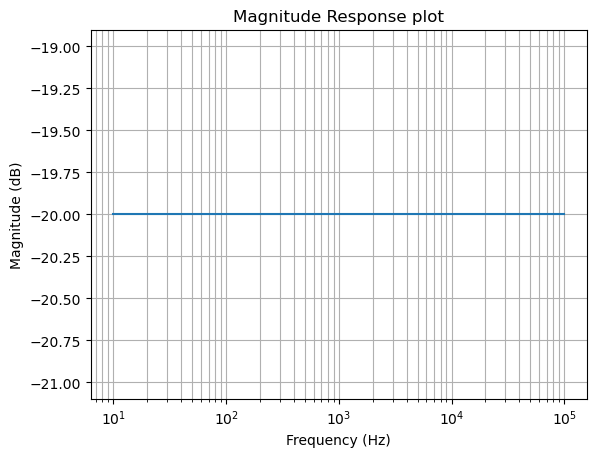

In [2]:
circ = circuit.Circuit()                
Vin  = circuit.VoltageSource(1.0)
op   = circuit.IdealOpAmp()
R1   = circuit.Resistor(100e3)
R2   = circuit.Resistor(10e3)

for c in (Vin, op, R1, R2):
    circ.addComponent(c)

circ.connectComponents(Vin,'p',  R1,'n')      
circ.connectComponents(Vin,'n',  None,None)   
circ.connectComponents(R1,'p',   R2,'n')      
circ.connectComponents(R1,'p',   op,'V-')    
circ.connectComponents(op,'V+',  None,None)   
circ.connectComponents(op,'Vout',R2,'p')      

f = np.logspace(1, 5, 400)           
mag = np.zeros_like(f, dtype=float)
phase = np.zeros_like(f, dtype=float)

for i, freq in enumerate(f):
    omega = 2 * np.pi * freq
    circ.setFrequency(omega)
    V = circ.solveSystem()
    Vout = V[op.Vout]
    mag[i] = 20 * np.log10(np.abs(Vout))
    phase[i] = np.angle(Vout, deg=True)



circuitPlotter = plter.Plotter(f, mag, phase)
circuitPlotter.plotMagnitude()


### Non inverting amplifier 

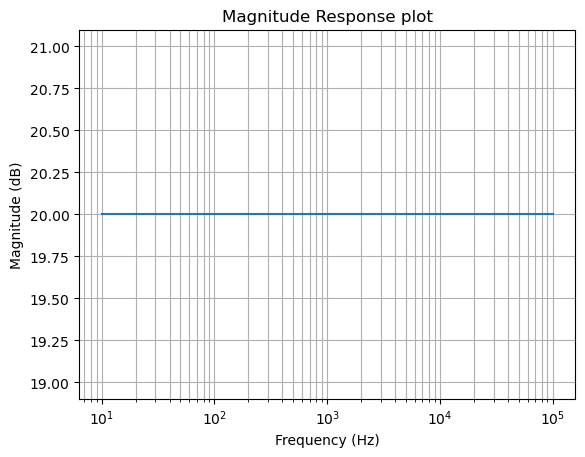

In [3]:
circ = circuit.Circuit()                
Vin  = circuit.VoltageSource(1.0)
op   = circuit.IdealOpAmp()
R1   = circuit.Resistor(10e3)
R2   = circuit.Resistor(90e3)

for c in (Vin, op, R1, R2):
    circ.addComponent(c)

circ.connectComponents(Vin,'p',  op,'V+')      
circ.connectComponents(R1, 'n', None, None)
circ.connectComponents(R1, 'p', R2, 'n')
circ.connectComponents(R1, 'p', op, 'V-')
circ.connectComponents(R2, 'p', op,'Vout')
circ.connectComponents(Vin,'n', None, None)


f = np.logspace(1, 5, 400)           
mag = np.zeros_like(f, dtype=float)
phase = np.zeros_like(f, dtype=float)

for i, freq in enumerate(f):
    omega = 2 * np.pi * freq
    circ.setFrequency(omega)
    V = circ.solveSystem()
    Vout = V[op.Vout]
    mag[i] = 20 * np.log10(np.abs(Vout))
    phase[i] = np.angle(Vout, deg=True)



circuitPlotter = plter.Plotter(f, mag, phase)
circuitPlotter.plotMagnitude()

### sallen key band pass

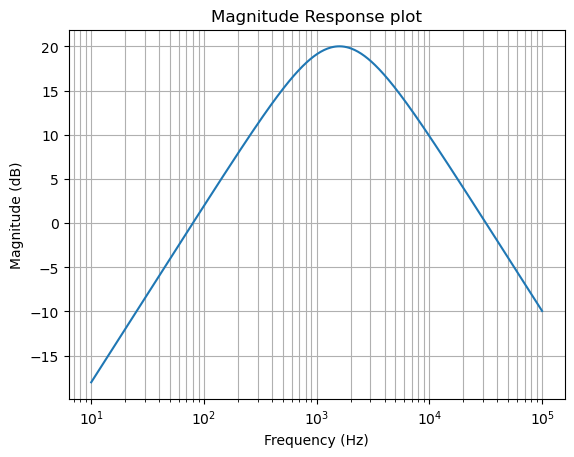

In [4]:

circ = circuit.Circuit()
Vin = circuit.VoltageSource(1.0)            
circ.addComponent(Vin)
circ.connectComponents(Vin, 'n',  None, None)  

opHP  = circuit.IdealOpAmp()
C1_HP = circuit.Capacitor(10e-9)         
C2_HP = circuit.Capacitor(10e-9)
R1_HP = circuit.Resistor (10e3)            
R2_HP = circuit.Resistor (200e3)

for c in (opHP, C1_HP, C2_HP, R1_HP, R2_HP):
    circ.addComponent(c)


circ.connectComponents(Vin,   'p', C1_HP, 'p')      
circ.connectComponents(C1_HP, 'n', opHP,  'V+')     
circ.connectComponents(C1_HP, 'n', R1_HP,'p')      
circ.connectComponents(R1_HP, 'n', None,  None)
circ.connectComponents(opHP,  'Vout', C2_HP,'n')   
circ.connectComponents(C2_HP, 'p', C1_HP,'n')       
circ.connectComponents(opHP,  'Vout', opHP,'V-')   

opLP  = circuit.IdealOpAmp()
R1_LP = circuit.Resistor (10e3)
R2_LP = circuit.Resistor (10e3)
C1_LP = circuit.Capacitor(10e-9)
C2_LP = circuit.Capacitor(10e-9)

for c in (opLP, R1_LP, R2_LP, C1_LP, C2_LP):
    circ.addComponent(c)

circ.connectComponents(opHP,'Vout', R1_LP,'p')     
circ.connectComponents(R1_LP,'n',   opLP,'V+')     
circ.connectComponents(R1_LP,'n',   C1_LP,'p')    
circ.connectComponents(C1_LP,'n',   None,  None)

circ.connectComponents(opLP,'Vout', R2_LP,'p')     
circ.connectComponents(R2_LP,'n',   R1_LP,'n')     
circ.connectComponents(opLP,'Vout', C2_LP,'n')     
circ.connectComponents(C2_LP,'p',   None,  None)
circ.connectComponents(opLP,'Vout', opLP,'V-')     


opG   = circuit.IdealOpAmp()
RinG  = circuit.Resistor(10e3)   
RfG   = circuit.Resistor(190e3)   

for c in (opG, RinG, RfG):
    circ.addComponent(c)


circ.connectComponents(opLP, 'Vout', opG,  'V+')


circ.connectComponents(opG,  'Vout', RfG, 'p')
circ.connectComponents(RfG,  'n',    opG, 'V-')
circ.connectComponents(opG,  'V-',   RinG,'p')
circ.connectComponents(RinG, 'n',    None, None)   

VOUT_NODE = opG.Vout      


f     = np.logspace(1, 5, 400)          
mag   = np.zeros_like(f)
phase = np.zeros_like(f)

for i, freq in enumerate(f):
    circ.setFrequency(2*np.pi*freq)
    V = circ.solveSystem()
    Vout = V[VOUT_NODE]
    mag[i]   = 20*np.log10(abs(Vout))
    phase[i] = np.angle(Vout, deg=True)

plter.Plotter(f, mag, phase).plotMagnitude()

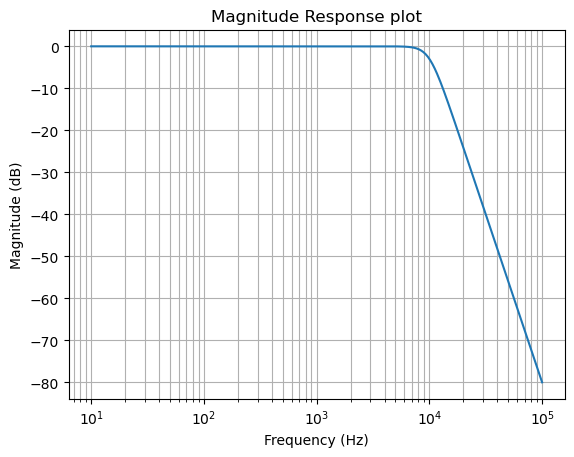

In [5]:
import Circuit as circ
import numpy as np

# ───────────────────────────────────────────────────────────
# 1.  Instantiate parts
# ───────────────────────────────────────────────────────────
Vin  = circ.VoltageSource(1.0)     # 1 V test source
# ─ stage‑1 components
R11  = circ.Resistor(26.6e3)       # 26.6 kΩ
R12  = circ.Resistor(95.1e3)       # 95.1 kΩ
C11  = circ.Capacitor(1e-9)        # 1 nF   (feedback cap)
C12  = circ.Capacitor(100e-12)     # 100 pF (shunt‑to‑gnd)
op1  = circ.IdealOpAmp()           # ADA4096‑2, chan A

# ─ stage‑2 components
R21  = circ.Resistor(12.8e3)       # 12.8 kΩ
R22  = circ.Resistor(26.4e3)       # 26.4 kΩ
C21  = circ.Capacitor(1e-9)        # 1 nF   (feedback cap)
C22  = circ.Capacitor(750e-12)     # 750 pF (shunt‑to‑gnd)
op2  = circ.IdealOpAmp()           # ADA4096‑2, chan B

# ───────────────────────────────────────────────────────────
# 2.  Drop them into a circuit container
# ───────────────────────────────────────────────────────────
ckt = circ.Circuit()
for dev in (Vin, R11, R12, C11, C12, op1,
            R21, R22, C21, C22, op2):
    ckt.addComponent(dev)

# ───────────────────────────────────────────────────────────
# 3.  Wire stage 1  (unity‑gain Sallen‑Key LPF)
# ───────────────────────────────────────────────────────────
ckt.connectComponents(Vin, 'p',  R11, 'p')         # Vin+ → R11
ckt.connectComponents(Vin, 'n',  None, None)       # Vin− → GND

ckt.connectComponents(R11,'n',  R12,'p')           # node A
ckt.connectComponents(R11,'n',  C11,'p')           # node A

ckt.connectComponents(R12,'n',  op1,'V+')          # node B
ckt.connectComponents(R12,'n',  C12,'p')           # node B
ckt.connectComponents(C12,'n',  None, None)        # C12 to GND

ckt.connectComponents(op1, 'Vout', op1, 'V-')      # follower
ckt.connectComponents(op1, 'Vout', C11, 'n')       # C11 to Vout

# ───────────────────────────────────────────────────────────
# 4.  Wire stage 2  (second Sallen‑Key LPF, identical topology)
# ───────────────────────────────────────────────────────────
ckt.connectComponents(op1,'Vout', R21,'p')         # stage‑1 out → R21

ckt.connectComponents(R21,'n',   R22,'p')          # node C
ckt.connectComponents(R21,'n',   C21,'p')          # node C

ckt.connectComponents(R22,'n',   op2,'V+')         # node D
ckt.connectComponents(R22,'n',   C22,'p')          # node D
ckt.connectComponents(C22,'n',   None, None)       # C22 to GND

ckt.connectComponents(op2,'Vout', op2,'V-')        # follower
ckt.connectComponents(op2,'Vout', C21,'n')         # C21 to Vout


VOUT_NODE = op2.Vout      


f     = np.logspace(1, 5, 400)          
mag   = np.zeros_like(f)
phase = np.zeros_like(f)

for i, freq in enumerate(f):
    ckt.setFrequency(2*np.pi*freq)
    V = ckt.solveSystem()
    Vout = V[VOUT_NODE]
    mag[i]   = 20*np.log10(abs(Vout))
    phase[i] = np.angle(Vout, deg=True)

plter.Plotter(f, mag, phase).plotMagnitude()


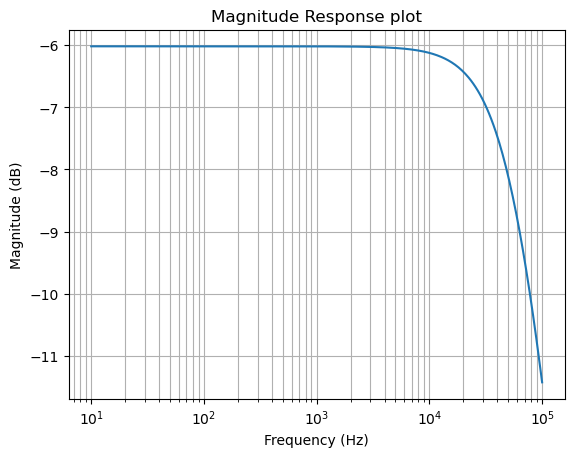

In [6]:
import Circuit as circ
import numpy as np

Vin  = circ.VoltageSource(1.0)   
R1  = circ.Resistor(5e3)      
R2  = circ.Resistor(5e3)      
C1  = circ.Capacitor(1e-9)      

ckt = circ.Circuit()
for dev in (Vin, R1, R2, C1):
    ckt.addComponent(dev)  
    
ckt.connectComponents(Vin, 'n', None, None)
ckt.connectComponents(Vin, 'p', R1, 'n')
ckt.connectComponents(R1, 'p', R2, 'n')
ckt.connectComponents(R1, 'p', C1, 'n')
ckt.connectComponents(R2, 'p', None, None)
ckt.connectComponents(C1, 'p', None, None)

VOUT_NODE = R2.n      


f     = np.logspace(1, 5, 400)          
mag   = np.zeros_like(f)
phase = np.zeros_like(f)

for i, freq in enumerate(f):
    ckt.setFrequency(2*np.pi*freq)
    V = ckt.solveSystem()
    Vout = V[VOUT_NODE]
    mag[i]   = 20*np.log10(abs(Vout))
    phase[i] = np.angle(Vout, deg=True)

plter.Plotter(f, mag, phase).plotMagnitude()



In [1]:
from new_translator_2 import Translator

T = Translator("testCircuit2.sp")
voltages = T.circuit.solveSystem()
print("Node voltages:", voltages)
print("Output node  :", T.VOUT)



Node voltages: {0: 0.0, -198: (2.5+0j), 1: (5+0j), 2: (2.5+0j), 3: (1.25+0j)}
Output node  : 3
